In [22]:
from matplotlib import pyplot as plt
from utils import *
import promethee_functions as pf

## 1. Data preparation

In [14]:
data = read_data()
# le = life expectancy -> maximum is better
# gdi = gender development index -> maximum is better
# hdi = human development index -> maximum is better
# eys = expected years of schooling -> maximum is better
# poptotal = total population -> maximum is better
# co2prod = production of co2 -> minimum is better
data.head()

,iso3,co2prod,poptotal,hdi,le,gdi,eys
6,ARG,"[3.434042462, 3.549403166, 3.611462427, 3.4612...","[32.6376565, 33.105763, 33.5682855, 34.0272395...","[0.724, 0.731, 0.736, 0.74, 0.746, 0.747, 0.75...","[71.784, 72.319, 72.43, 72.565, 73.172, 73.133...","[0.968, 0.97, 0.973, 0.981, 0.975, 0.973, 0.98...","[13.39248967, 13.35243988, 13.31250985, 13.272..."
13,BGD,"[0.131422386, 0.134947067, 0.138218832, 0.1416...","[107.147651, 109.2428345, 111.2721025, 113.418...","[0.399, 0.397, 0.416, 0.423, 0.431, 0.44, 0.44...","[55.989, 54.154, 57.635, 57.927, 58.617, 59.46...","[0.743, 0.751, 0.772, 0.779, 0.788, 0.796, 0.7...","[5.540100098, 5.742722766, 5.945345434, 6.1479..."
34,CHL,"[2.466343818, 2.277829618, 2.321862604, 2.4358...","[13.342868, 13.5619455, 13.782297, 13.998386, ...","[0.705, 0.714, 0.722, 0.716, 0.722, 0.728, 0.7...","[72.574, 73.574, 74.135, 74.195, 74.614, 74.60...","[0.929, 0.925, 0.93, 0.932, 0.935, 0.935, 0.94...","[12.74779872, 12.73688984, 12.7259903, 11.7391..."
49,DOM,"[1.253471032, 1.310493705, 1.402682522, 1.4794...","[7.129004, 7.278402, 7.42734, 7.576074, 7.7239...","[0.579, 0.585, 0.595, 0.602, 0.608, 0.614, 0.6...","[67.11, 67.625, 68.084, 68.472, 68.792, 68.988...","[0.909, 0.91, 0.922, 0.877, 0.921, 0.922, 0.92...","[9.284750781, 9.453856966, 9.626043137, 9.8013..."
51,EGY,"[1.31465501, 1.318792681, 1.332572818, 1.50333...","[57.2146305, 58.611032, 59.989142, 61.3822, 62...","[0.567, 0.574, 0.58, 0.587, 0.594, 0.601, 0.61...","[64.146, 64.755, 65.031, 65.468, 65.816, 66.31...","[0.82, 0.816, 0.826, 0.828, 0.835, 0.829, 0.80...","[9.206990242, 9.250329971, 9.430852532, 9.6113..."


In [16]:
# Pass through the score functions

def score_function(column, maximize=True):
    """ 
    Function that gets the datasets and modify the data to evaluate the scores of the different criterias
    - column: each value is a time series, if we want to minimize it, we have to invert it
    - mininimize: boolean, if we want to minimize the value
    """
    def invert_values(column):
        return [-x for x in column]

    if maximize:
        return column
    else:
        # Invert the values: the higher the value, the lower the score
        column = invert_values(column)
        # Get the minimum value of the column
        min_value = min([min(x) for x in column])
        # Add the minimum value to the column in order to have only positive values
        column = [x + abs(min_value) for x in column]
        return column


    

column = data["co2prod"]
score = score_function(column, maximize=False)

data["co2prod"] = score

data.head()

,iso3,co2prod,poptotal,hdi,le,gdi,eys
6,ARG,"[14.039834358, 13.924473654000002, 13.86241439...","[32.6376565, 33.105763, 33.5682855, 34.0272395...","[0.724, 0.731, 0.736, 0.74, 0.746, 0.747, 0.75...","[71.784, 72.319, 72.43, 72.565, 73.172, 73.133...","[0.968, 0.97, 0.973, 0.981, 0.975, 0.973, 0.98...","[13.39248967, 13.35243988, 13.31250985, 13.272..."
13,BGD,"[17.342454434, 17.338929753000002, 17.33565798...","[107.147651, 109.2428345, 111.2721025, 113.418...","[0.399, 0.397, 0.416, 0.423, 0.431, 0.44, 0.44...","[55.989, 54.154, 57.635, 57.927, 58.617, 59.46...","[0.743, 0.751, 0.772, 0.779, 0.788, 0.796, 0.7...","[5.540100098, 5.742722766, 5.945345434, 6.1479..."
34,CHL,"[15.007533002, 15.196047202, 15.15201421600000...","[13.342868, 13.5619455, 13.782297, 13.998386, ...","[0.705, 0.714, 0.722, 0.716, 0.722, 0.728, 0.7...","[72.574, 73.574, 74.135, 74.195, 74.614, 74.60...","[0.929, 0.925, 0.93, 0.932, 0.935, 0.935, 0.94...","[12.74779872, 12.73688984, 12.7259903, 11.7391..."
49,DOM,"[16.220405788, 16.163383115000002, 16.07119429...","[7.129004, 7.278402, 7.42734, 7.576074, 7.7239...","[0.579, 0.585, 0.595, 0.602, 0.608, 0.614, 0.6...","[67.11, 67.625, 68.084, 68.472, 68.792, 68.988...","[0.909, 0.91, 0.922, 0.877, 0.921, 0.922, 0.92...","[9.284750781, 9.453856966, 9.626043137, 9.8013..."
51,EGY,"[16.159221810000002, 16.155084139, 16.14130400...","[57.2146305, 58.611032, 59.989142, 61.3822, 62...","[0.567, 0.574, 0.58, 0.587, 0.594, 0.601, 0.61...","[64.146, 64.755, 65.031, 65.468, 65.816, 66.31...","[0.82, 0.816, 0.826, 0.828, 0.835, 0.829, 0.80...","[9.206990242, 9.250329971, 9.430852532, 9.6113..."


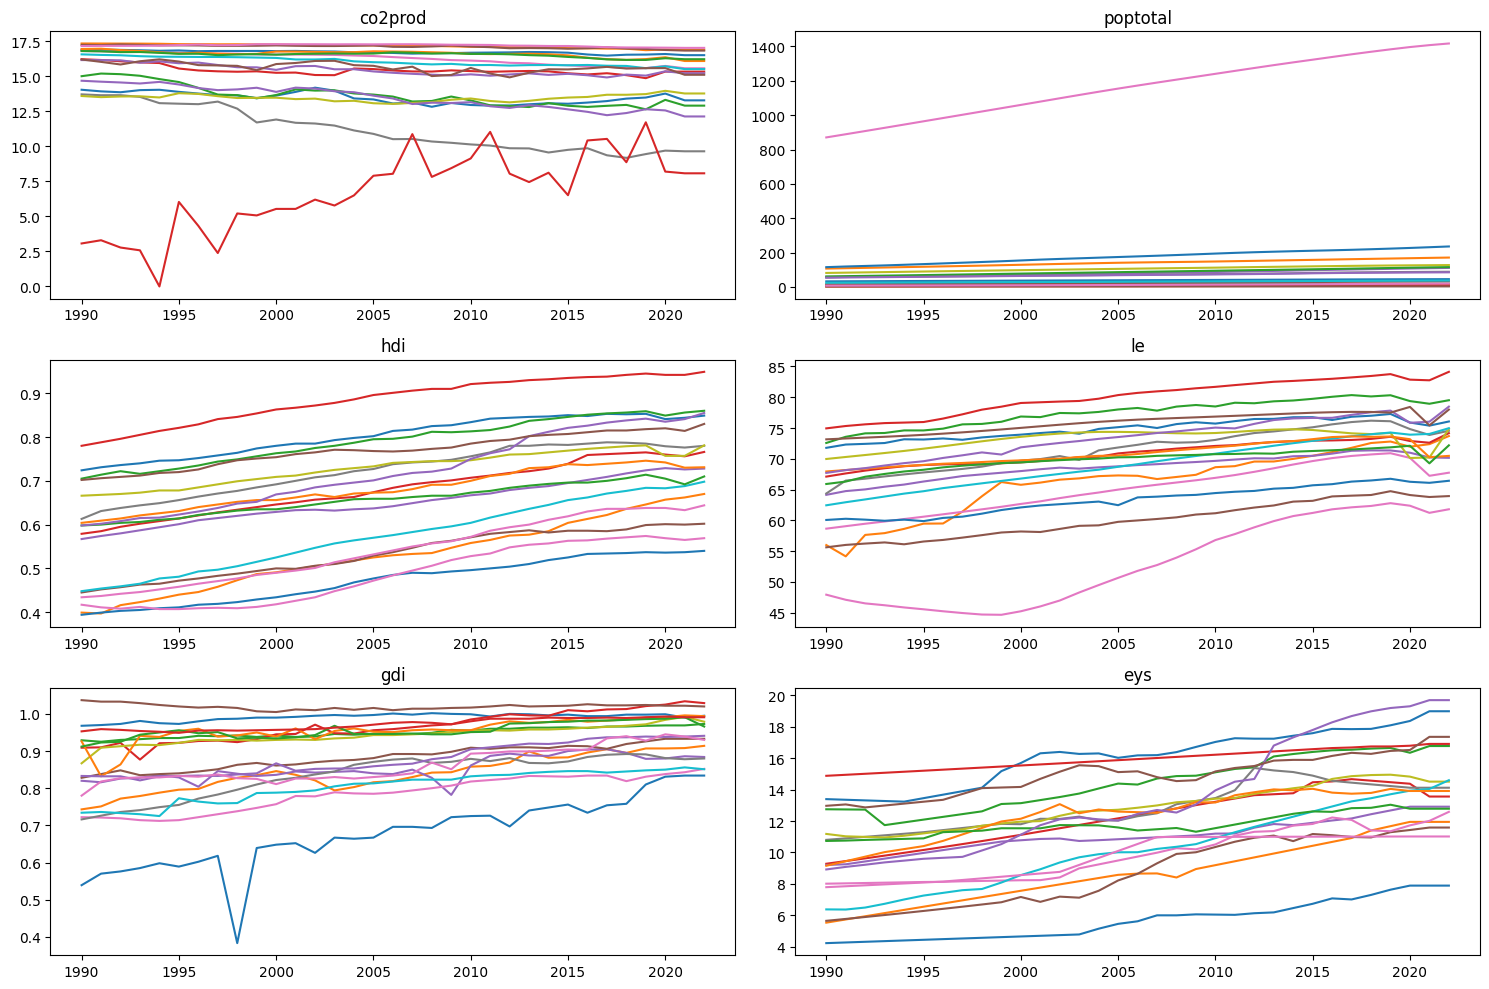

In [17]:
plot_data(data)

In [18]:
data = scale_data(data)
data.head()

,iso3,co2prod,poptotal,hdi,le,gdi,eys
6,ARG,"[0.809564436881253, 0.8029125120087371, 0.7993...","[0.020942210735571794, 0.021273226668040518, 0...","[0.5945945945945946, 0.6072072072072072, 0.616...","[0.6871611693773119, 0.7007143942848458, 0.703...","[0.8944954128440368, 0.897553516819572, 0.9021...","[0.5926342789353461, 0.5900415074178023, 0.587..."
13,BGD,"[1.0, 0.9997967599676614, 0.9996081035688539, ...","[0.07363106531814378, 0.07511264935926601, 0.0...","[0.009009009009009018, 0.005405405405405411, 0...","[0.28702437047170287, 0.24053807569539457, 0.3...","[0.5504587155963303, 0.562691131498471, 0.5948...","[0.08428075131536233, 0.09739828033109835, 0.1..."
34,CHL,"[0.8653638421893518, 0.8762339413853697, 0.873...","[0.007298131007744375, 0.00745304905085084, 0....","[0.5603603603603603, 0.5765765765765766, 0.590...","[0.7071743426052592, 0.7325074732735471, 0.746...","[0.8348623853211011, 0.8287461773700308, 0.836...","[0.5508978220705721, 0.5501915953125217, 0.549..."
49,DOM,"[0.9353004702840553, 0.9320124309112543, 0.926...","[0.002904071138475708, 0.0030097161536142758, ...","[0.33333333333333326, 0.34414414414414407, 0.3...","[0.5687541166337337, 0.581800678927902, 0.5934...","[0.8042813455657494, 0.8058103975535169, 0.824...","[0.32670458509909345, 0.3376523004281499, 0.34..."
51,EGY,"[0.931772481888131, 0.9315338956478875, 0.9307...","[0.03832152498536217, 0.039308973663436976, 0....","[0.31171171171171164, 0.32432432432432423, 0.3...","[0.4936667173329281, 0.5090945939099153, 0.516...","[0.6681957186544343, 0.6620795107033639, 0.677...","[0.3216704685479691, 0.32447622645404717, 0.33..."


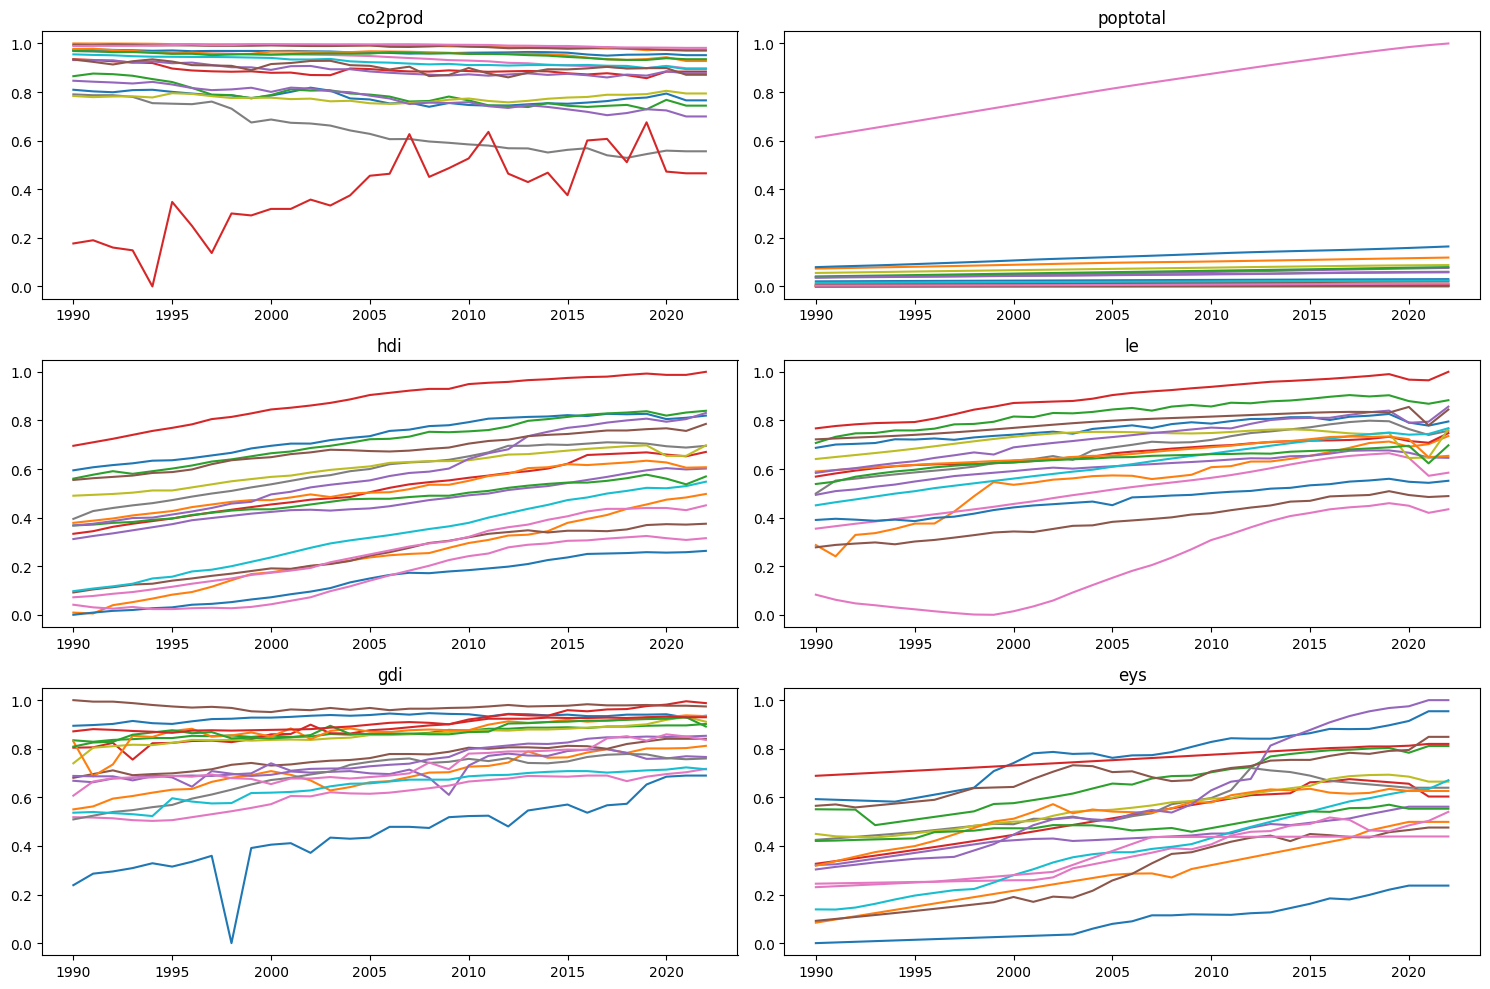

In [19]:
plot_data(data)

## 2 Applying Promethee

In [ ]:
L = data.iloc[0]["co2prod"].shape[0] # Length of the time series
N = data.shape[0] # Number of time series
K = data.columns.shape[0] -1 # Number of features

W = [1/K for _ in range(K)]
P = [0.95 for _ in range(K)]
Q = [0.1 for _ in range(K)]

In [ ]:
criterias = data.columns[1:]
alternatives = data["iso3"].values
print(criterias)
print(alternatives)

Index(['co2prod', 'poptotal', 'hdi', 'le', 'gdi', 'eys'], dtype='object')
['ARG' 'BGD' 'CHL' 'DOM' 'EGY' 'GHA' 'IND' 'IRN' 'MEX' 'MAR' 'PAK' 'PRY'
 'PHL' 'SGP' 'TUR' 'URY' 'ZMB']


c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\promethee_functions.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]


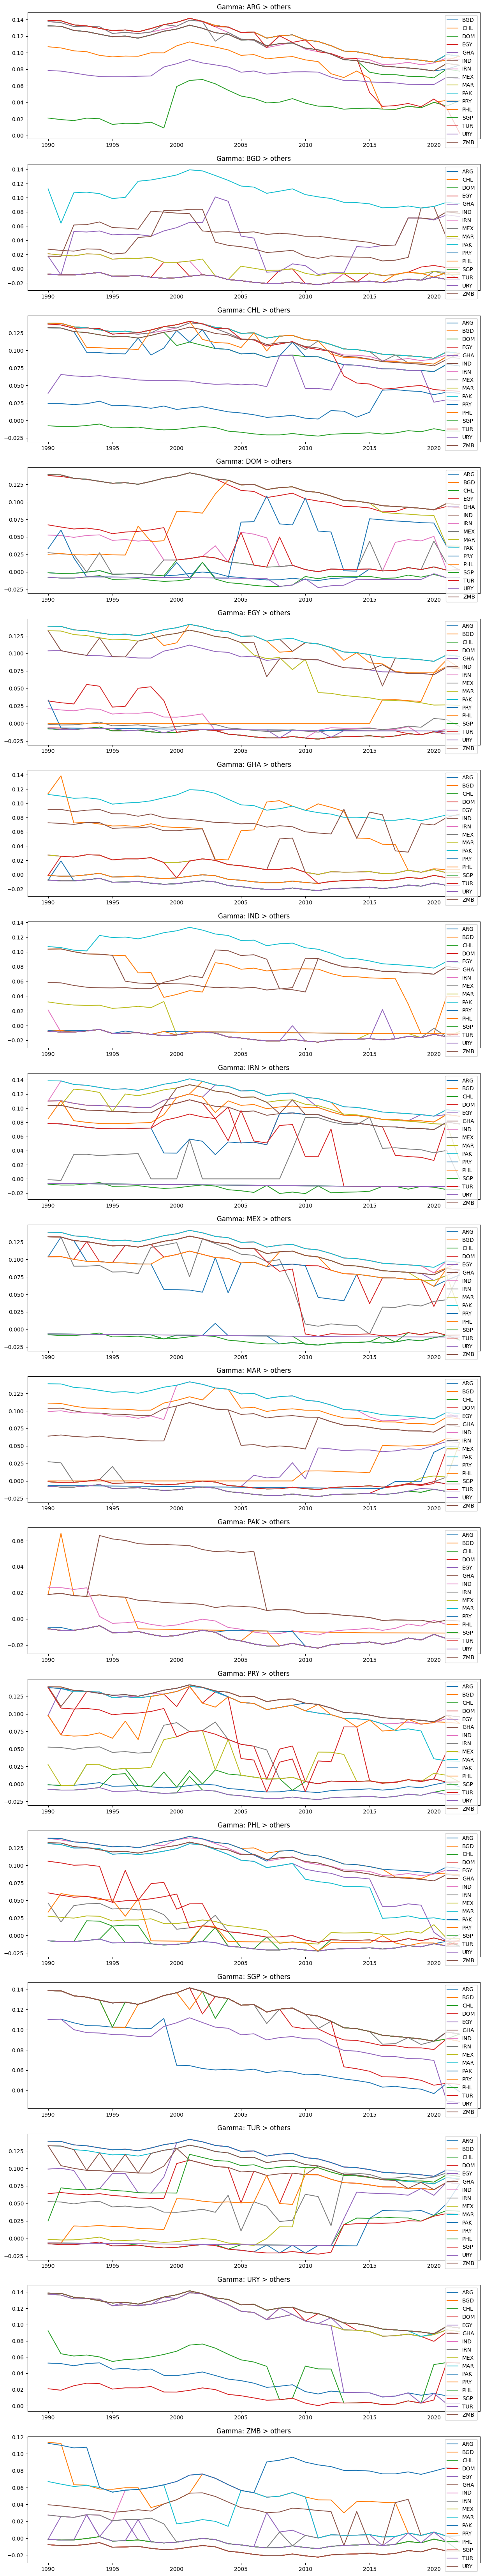

In [37]:
phi_c_all = pf.get_all_Phi_c(data, P, Q)

gamma = pf.get_gamma_matrix(data, phi_c_all, W)


plot_gammas(gamma, alternatives)